In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sympy import symbols, Matrix, solve, diff

# Ejercicio 1

In [58]:
def rk4(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = t0
    y = y0
    
    for i in range(n):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
    
    return y

In [59]:
def rk4_system(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = t0
    y = np.array(y0)
    
    for i in range(n):
        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + h/2, y + k1/2))
        k3 = h * np.array(f(t + h/2, y + k2/2))
        k4 = h * np.array(f(t + h, y + k3))
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
    
    return y

# Ejercicio 2

## 2a
Grafique el campo vectorial o plano de fase asociado a ese sistema de EDO.


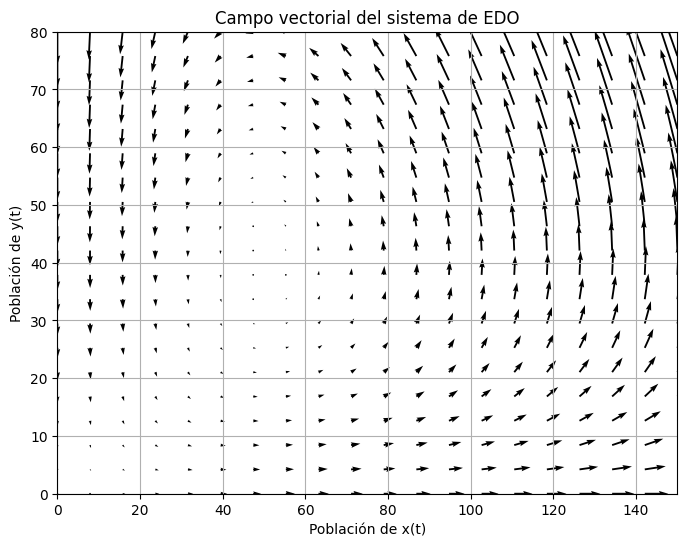

In [60]:
def dx_dt(x, y):
    return 0.2*x - 0.005*x*y

def dy_dt(x, y):
    return -0.5*y + 0.01*x*y

x = np.linspace(0, 150, 20)
y = np.linspace(0, 80, 20)
X, Y = np.meshgrid(x, y)

U = dx_dt(X, Y)
V = dy_dt(X, Y)

# Graficar el campo vectorial
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V)
plt.title("Campo vectorial del sistema de EDO")
plt.xlabel("Poblaci√≥n de x(t)")
plt.ylabel("Poblaci√≥n de y(t)")
plt.xlim([0, 150])
plt.ylim([0, 80])
plt.grid(True)
plt.show()


## 2b
Usando algoritmos computacionales, encuentre todos los puntos de equilibro del sistema de EDO (s√≥lo los que est√°n en el primero cuadrante, incluyendo los ejes y el origen) y clasificarlos de acuerdo a su comportamiento. Explique cualitativamente c√≥mo se comportan las soluciones cerca del punto de equilibro obtenido.

In [61]:
x, y = symbols('x y')
f1 = 0.2*x - 0.005*x*y
f2 = -0.5*y + 0.01*x*y

# Calcular la matriz Jacobiana
jacobian_matrix = Matrix([[diff(f1, x), diff(f1, y)], [diff(f2, x), diff(f2, y)]])

# Evaluar la matriz Jacobiana en los puntos de equilibrio
equilibrium_points = [(0, 0), (0, 40), (50, 0), (50, 40)]
for point in equilibrium_points:
    jacobian_at_point = jacobian_matrix.subs({x: point[0], y: point[1]})
    eigenvalues = jacobian_at_point.eigenvals()
    print(f"Punto de equilibrio: {point}")
    print(f"Jacobian:\n{jacobian_at_point}")
    print(f"Valores propios: {eigenvalues}\n")


Punto de equilibrio: (0, 0)
Jacobian:
Matrix([[0.200000000000000, 0], [0, -0.500000000000000]])
Valores propios: {0.200000000000000: 1, -0.500000000000000: 1}

Punto de equilibrio: (0, 40)
Jacobian:
Matrix([[0, 0], [0.400000000000000, -0.500000000000000]])
Valores propios: {0: 1, -0.500000000000000: 1}

Punto de equilibrio: (50, 0)
Jacobian:
Matrix([[0.200000000000000, -0.250000000000000], [0, 0]])
Valores propios: {0.200000000000000: 1, 0: 1}

Punto de equilibrio: (50, 40)
Jacobian:
Matrix([[0, -0.250000000000000], [0.400000000000000, 0]])
Valores propios: {-0.316227766016838*I: 1, 0.316227766016838*I: 1}



## 2c
Resuelva el sistema de EDO, con su algoritmo de Runge-Kutta, para la condici√≥n inicial 

x(0) = 70, y(0) = 30

Obtenga una gr√°fica de la soluci√≥n obtenida, y estime cu√°l ser√≠a la poblaci√≥n x & y despu√©s de 5 a√±os. Aproxime cu√°l es el valor del per√≠odo o ciclo de repetici√≥n de las poblaciones.

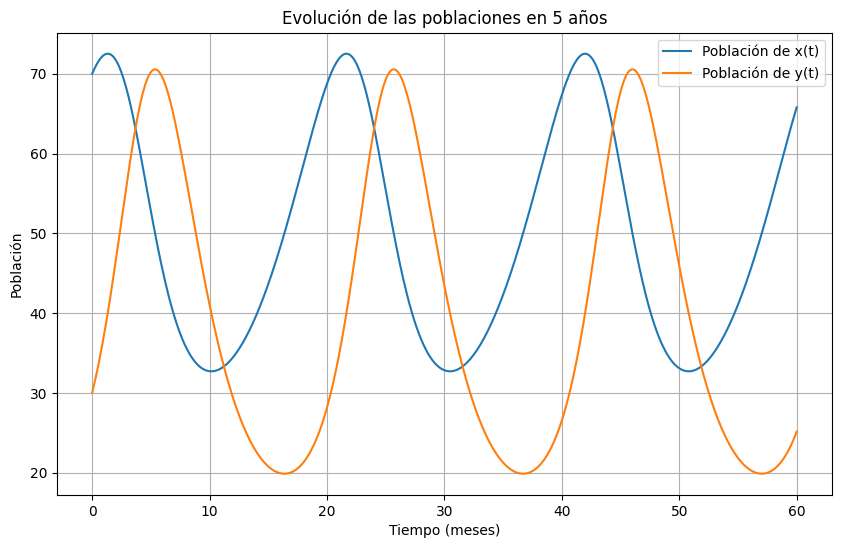

Poblaci√≥n de x despu√©s de 5 a√±os: 65.80281308173875
Poblaci√≥n de y despu√©s de 5 a√±os: 25.13725727333798


In [62]:
def f(t, Y):
    x, y = Y
    dxdt = 0.2*x - 0.005*x*y
    dydt = -0.5*y + 0.01*x*y
    return np.array([dxdt, dydt])

def rk4_system(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = t0
    y = np.array(y0)
    sol = np.zeros((n+1, len(y0)))
    time = np.zeros(n+1)
    sol[0] = y0
    time[0] = t0
    
    for i in range(1, n+1):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
        sol[i] = y
        time[i] = t
    
    return time, sol

y0 = [70, 30]
t0 = 0
tf = 60  # 5 a√±os (60 meses)
h = 0.1

time, sol = rk4_system(f, y0, t0, tf, h)

plt.figure(figsize=(10, 6))
plt.plot(time, sol[:, 0], label='Poblaci√≥n de x(t)')
plt.plot(time, sol[:, 1], label='Poblaci√≥n de y(t)')
plt.title('Evoluci√≥n de las poblaciones en 5 a√±os')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Poblaci√≥n')
plt.legend()
plt.grid(True)
plt.show()

print(f"Poblaci√≥n de x despu√©s de 5 a√±os: {sol[-1, 0]}")
print(f"Poblaci√≥n de y despu√©s de 5 a√±os: {sol[-1, 1]}")

## 2d
Repita la soluci√≥n del sistema de EDO, esta vez para la condici√≥n inicial 

x(0) = 100, y(0) = 10

Obtenga una gr√°fica de la soluci√≥n obtenida, y estime cu√°l ser√° la poblaci√≥n para las especies x y y despu√©s de 5 a√±os. Aproxime cu√°l es el valor del per√≠odo o ciclo de repetici√≥n de las poblaciones.

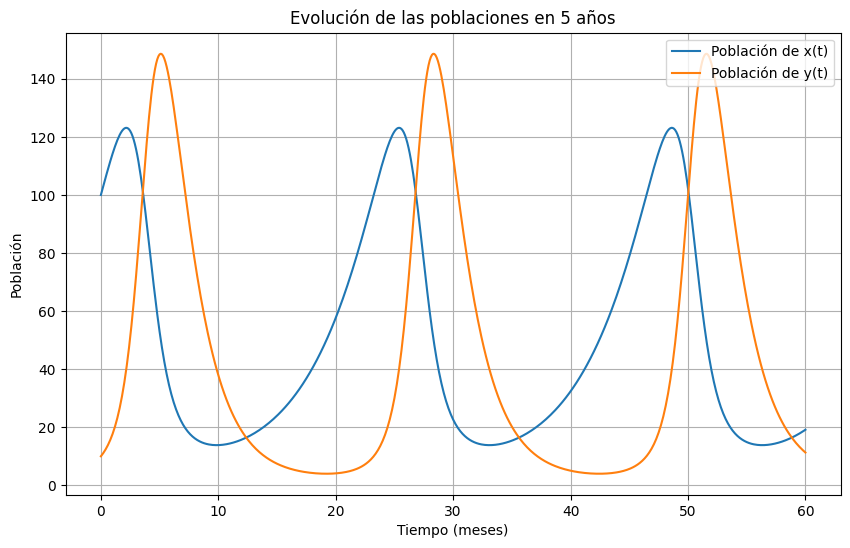

Poblaci√≥n de x despu√©s de 5 a√±os: 19.150564378249037
Poblaci√≥n de y despu√©s de 5 a√±os: 11.298504631881979


In [63]:
y0 = [100, 10]

time, sol2 = rk4_system(f, y0, t0, tf, h)

plt.figure(figsize=(10, 6))
plt.plot(time, sol2[:, 0], label='Poblaci√≥n de x(t)')
plt.plot(time, sol2[:, 1], label='Poblaci√≥n de y(t)')
plt.title('Evoluci√≥n de las poblaciones en 5 a√±os')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Poblaci√≥n')
plt.legend()
plt.grid(True)
plt.show()

print(f"Poblaci√≥n de x despu√©s de 5 a√±os: {sol2[-1, 0]}")
print(f"Poblaci√≥n de y despu√©s de 5 a√±os: {sol2[-1, 1]}")


## 2e
Grafique ambas trayectorias obtenidas en su plano de fase xy (encima del campo vectorial). Ilustre en la gr√°fica el valor de la poblaci√≥n inicial y final (a los 5 a√±os) en cada caso.

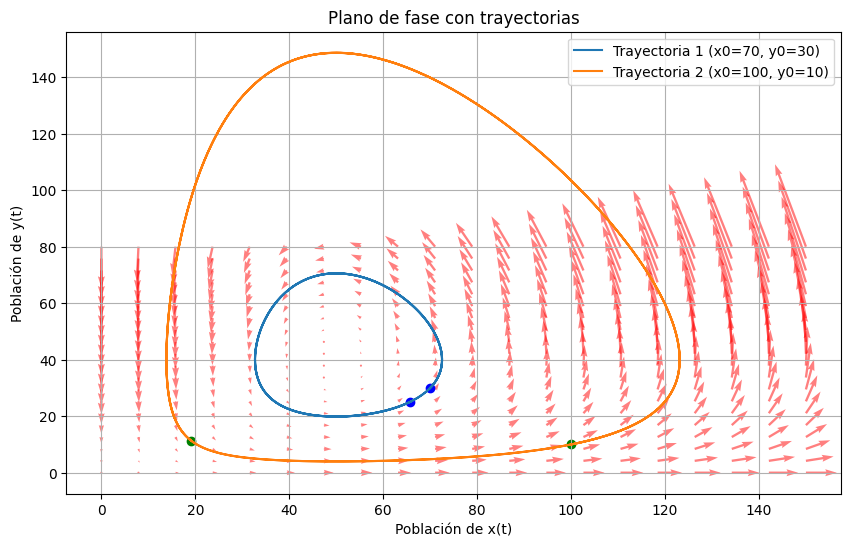

In [64]:
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, U, V, color='r', alpha=0.5)
plt.plot(sol[:, 0], sol[:, 1], label='Trayectoria 1 (x0=70, y0=30)')
plt.plot(sol2[:, 0], sol2[:, 1], label='Trayectoria 2 (x0=100, y0=10)')
plt.title('Plano de fase con trayectorias')
plt.xlabel('Poblaci√≥n de x(t)')
plt.ylabel('Poblaci√≥n de y(t)')
plt.scatter([sol[0, 0], sol[-1, 0]], [sol[0, 1], sol[-1, 1]], color='blue')  # Poblaci√≥n inicial y final para la primera trayectoria
plt.scatter([sol2[0, 0], sol2[-1, 0]], [sol2[0, 1], sol2[-1, 1]], color='green')  # Poblaci√≥n inicial y final para la segunda trayectoria
plt.grid(True)
plt.legend()
plt.show()

## 2f
Explique o describa cualitativamente el comportamiento del sistema de poblaciones.

- Punto de equilibrio (0, 0): punto de equilibrio trivial donde ambas poblaciones se extinguen. Punto de silla.

- Punto de equilibrio (50, 0): la poblaci√≥n de ùë¶ se extingue y la de ùë• permanece en 50. Punto de silla.

- Punto de equilibrio (0, 40): la poblaci√≥n de ùë• se extingue mientras la de ùë¶ permanece en 40. Punto de silla.

- Punto de equilibrio (50, 40): suele ser un nodo o foco, dependiendo de los valores propios del Jacobiano. En este punto, ambas poblaciones coexisten y muestran un comportamiento oscilatorio o estable alrededor de este mismo punto.

Como se mencion√≥ anteriormente, las trayectorias ciclan alrededor del punto (50, 40), lo cual promueve o sugiere un comportamiento oscilatorio. Esto hace llegar a la conclusi√≥n que una especie influye sobre la otra de forma c√≠clica.

# Ejercicio 3

## 3a
Grafique el campo vectorial o plano de fase asociado a ese sistema de EDO.

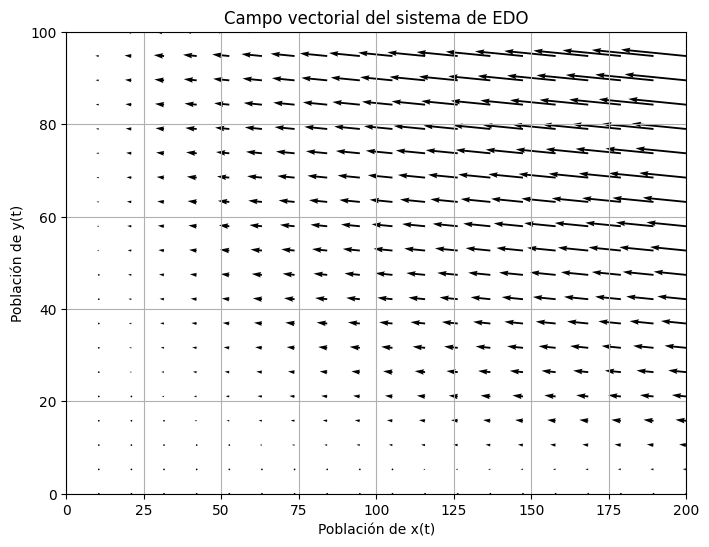

In [65]:
def dx_dt(x, y):
    return 0.5*x - 0.001*x**2 - x*y

def dy_dt(x, y):
    return -0.2*y + 0.1*x*y

x = np.linspace(0, 200, 20)
y = np.linspace(0, 100, 20)
X, Y = np.meshgrid(x, y)

U = dx_dt(X, Y)
V = dy_dt(X, Y)

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V)
plt.title("Campo vectorial del sistema de EDO")
plt.xlabel("Poblaci√≥n de x(t)")
plt.ylabel("Poblaci√≥n de y(t)")
plt.xlim([0, 200])
plt.ylim([0, 100])
plt.grid(True)
plt.show()

## 3b
Usando algoritmos computacionales, encuentre todos los puntos de equilibro del sistema de EDO (s√≥lo los que est√°n en el primero cuadrante, incluyendo los ejes y el origen). y clasificarlos de acuerdo a su comportamiento. Explique cualitativamente c√≥mo se comportan las soluciones cerca del punto de equilibro obtenido.

In [66]:
x, y = symbols('x y')
f1 = 0.5*x - 0.001*x**2 - x*y
f2 = -0.2*y + 0.1*x*y

jacobian_matrix = Matrix([[diff(f1, x), diff(f1, y)], [diff(f2, x), diff(f2, y)]])

equilibrium_points = [(0, 0), (2, 0), (200, 0), (2, 0.498)]
for point in equilibrium_points:
    jacobian_at_point = jacobian_matrix.subs({x: point[0], y: point[1]})
    eigenvalues = jacobian_at_point.eigenvals()
    print(f"Punto de equilibrio: {point}")
    print(f"Jacobian:\n{jacobian_at_point}")
    print(f"Valores propios: {eigenvalues}\n")


Punto de equilibrio: (0, 0)
Jacobian:
Matrix([[0.500000000000000, 0], [0, -0.200000000000000]])
Valores propios: {0.500000000000000: 1, -0.200000000000000: 1}

Punto de equilibrio: (2, 0)
Jacobian:
Matrix([[0.496000000000000, -2], [0, 0]])
Valores propios: {0.496000000000000: 1, 0: 1}

Punto de equilibrio: (200, 0)
Jacobian:
Matrix([[0.100000000000000, -200], [0, 19.8000000000000]])
Valores propios: {0.100000000000000: 1, 19.8000000000000: 1}

Punto de equilibrio: (2, 0.498)
Jacobian:
Matrix([[-0.00200000000000000, -2], [0.0498000000000000, 0]])
Valores propios: {-0.001 - 0.315593092446587*I: 1, -0.001 + 0.315593092446587*I: 1}



## 3c
Resuelva el sistema de EDO, con su algoritmo de Runge-Kutta, para la condici√≥n inicial

x(0) = 10, y(0) = 10

Obtenga una gr√°fica de la soluci√≥n obtenida, y estime cu√°l ser√° la poblaci√≥n x y y despu√©s de 5 a√±os.

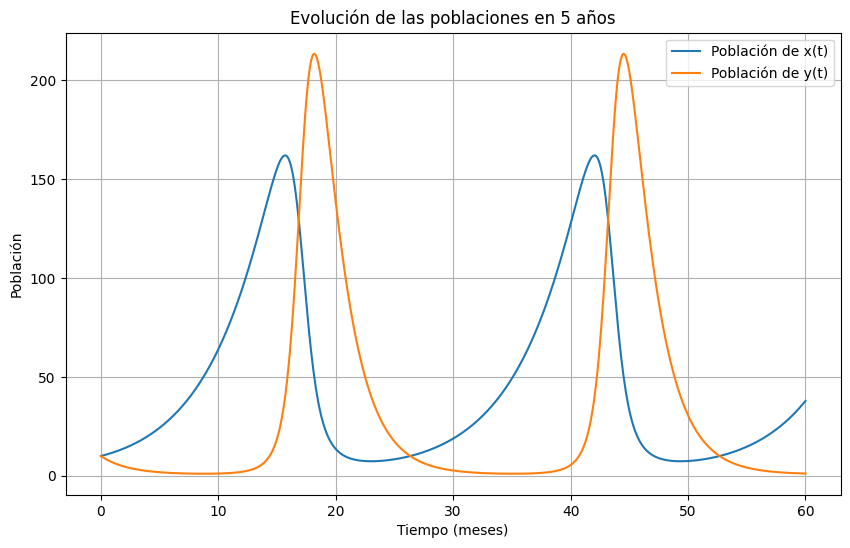

Poblaci√≥n de x despu√©s de 5 a√±os: 37.843302273039306
Poblaci√≥n de y despu√©s de 5 a√±os: 1.1577988164943653


In [67]:
y0 = [10, 10]
t0 = 0
tf = 60  # 5 a√±os (60 meses)
h = 0.1

time, sol = rk4_system(f, y0, t0, tf, h)

plt.figure(figsize=(10, 6))
plt.plot(time, sol[:, 0], label='Poblaci√≥n de x(t)')
plt.plot(time, sol[:, 1], label='Poblaci√≥n de y(t)')
plt.title('Evoluci√≥n de las poblaciones en 5 a√±os')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Poblaci√≥n')
plt.legend()
plt.grid(True)
plt.show()

print(f"Poblaci√≥n de x despu√©s de 5 a√±os: {sol[-1, 0]}")
print(f"Poblaci√≥n de y despu√©s de 5 a√±os: {sol[-1, 1]}")

## 3d
Grafique la trayectoria obtenidas en su plano de fase xy (encima del campo vectorial). Ilustre en la gr√°fica el valor de la poblaci√≥n inicial y final (a los 5 a√±os) en cada caso.

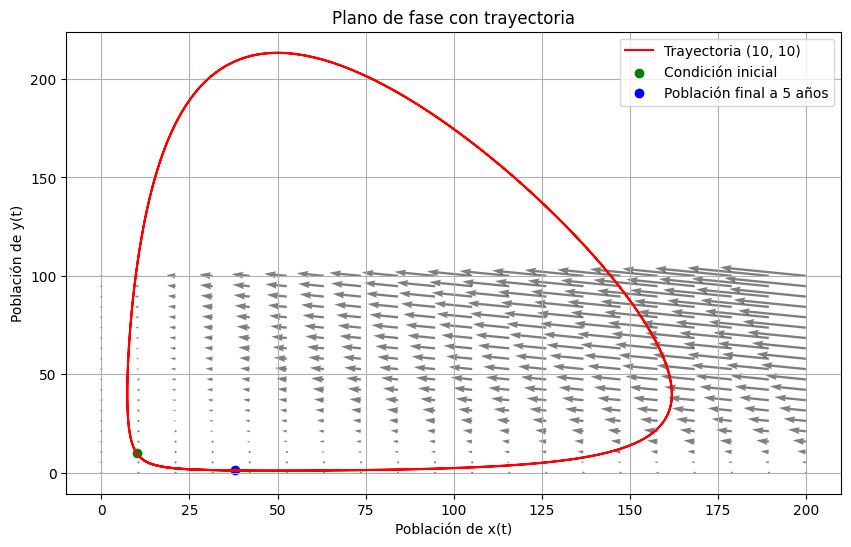

In [68]:
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, U, V, alpha=0.5)
plt.plot(sol[:, 0], sol[:, 1], label='Trayectoria (10, 10)', color='r')
plt.scatter(y0[0], y0[1], color='green', label='Condici√≥n inicial')
plt.scatter(sol[-1, 0], sol[-1, 1], color='blue', label='Poblaci√≥n final a 5 a√±os')
plt.title('Plano de fase con trayectoria')
plt.xlabel('Poblaci√≥n de x(t)')
plt.ylabel('Poblaci√≥n de y(t)')
plt.legend()
plt.grid(True)
plt.show()


## 3e
Explique o describa cualitativamente el comportamiento del sistema de poblaciones

- Punto de equilibrio (0, 0): punto de equilibrio donde ambas poblaciones se extinguen. Puede ser un nodo repulsivo o un punto de silla, dependiendo de los valores propios de la matriz Jacobiana.

- Punto de equilibrio (2, 0): la poblaci√≥n de ùë• permanece en 2 mientras que ùë¶ se extingue. Puede ser un punto de silla.

- Punto de equilibrio (200, 0): la poblaci√≥n ùë• alcanza su capacidad m√°xima en 200 mientras que la poblaci√≥n de ùë¶ se extingue. Puede ser un punto de silla o un nodo.

- Punto de equilibrio (2, 0.498): donde ambas especies coexisten en equilibrio. Dependiendo de los valores propios de la matriz Jacobiana en este punto, podr√≠a ser un nodo estable, inestable o un foco.

A partir de lo observado, el sistema muestra un comportamiento t√≠pico para el modelo depredador-presa donde se involucra la coexistencia entre especies. Dependiendo de las condiciones iniciales, las poblaciones pueden estabilizarse, extinguirse o entrar en ciclos.

# Ejercicio 4

Posici√≥n inicial: p0 = (0.325514, ‚àí0.459460, 0.166229)

Velocidad inicial: v0 = (‚àí9.096111, ‚àí6.916686, ‚àí1.305721)

Constante Œº: Œº = 4œÄ^2

Tiempo inicial: 9 de febrero de 1986 (t=0)

Tiempo futuro: t = 100 a√±os (para 2086) y t = 200 a√±os (para 2186)

$$\frac{d^2x}{dt^2} = -Œº \frac{x}{r^3},   \frac{d^2y}{dt^2} = -Œº \frac{y}{r^3},   \frac{d^2z}{dt^2} = -Œº \frac{z}{r^3}$$

$$ r = \sqrt{x^2 + y^2 + z^2} $$

Ecuaciones de movimiento

$$ \frac{dx}{dt} = vx,\frac{dvx}{dt} = -Œº \frac{x}{r^3} $$

$$ \frac{dy}{dt} = vy,\frac{dvy}{dt} = -Œº \frac{y}{r^3} $$

$$ \frac{dz}{dt} = vz,\frac{dvz}{dt} = -Œº \frac{z}{r^3} $$

In [125]:
def f(t, u, mu):
    x, y, z, vx, vy, vz = u 
    r = np.sqrt(x**2 + y**2 + z**2)
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = -mu * x / r**3
    dvydt = -mu * y / r**3
    dvzdt = -mu * z / r**3
    
    return np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])

def rk4_step(f, t, u, dt, mu):
    k1 = f(t, u, mu)
    k2 = f(t + 0.5*dt, u + 0.5*dt*k1, mu)
    k3 = f(t + 0.5*dt, u + 0.5*dt*k2, mu)
    k4 = f(t + dt, u + dt*k3, mu)
    
    return u + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)


In [155]:
# Constantes
mu = 4 * np.pi**2
dt = 0.01  # Paso de tiempo en a√±os
t_final = 250  # Tiempo final en a√±os

# Condiciones iniciales
p0 = np.array([0.325514, -0.459460, 0.166229])
v0 = np.array([-9.096111, -6.916686, -1.305721])
u0 = np.concatenate((p0, v0))

# Tiempo y almacenamiento de resultados
t = 0
n_steps = int(t_final / dt)
trajectory = np.zeros((n_steps, 6))

# Simulaci√≥n
for i in range(n_steps):
    trajectory[i] = u0
    u0 = rk4_step(f, t, u0, dt, mu)
    t += dt



In [156]:
# Extraer trayectorias para graficar
x = trajectory[:, 0]
y = trajectory[:, 1]
z = trajectory[:, 2]

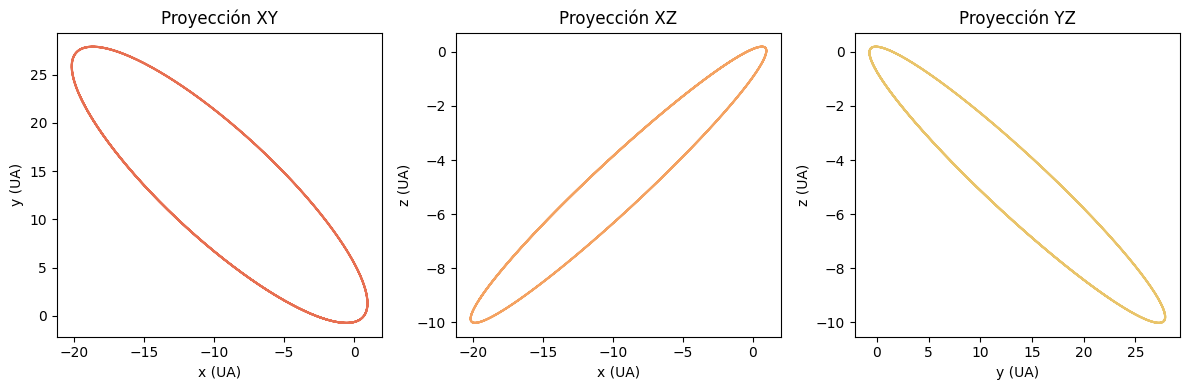

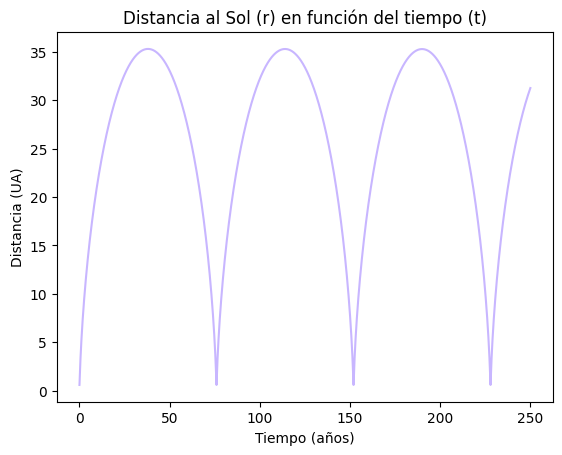

In [162]:
# Proyecciones xy, xz, yz
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x, y, color='#e76f51')
plt.title("Proyecci√≥n XY")
plt.xlabel("x (UA)")
plt.ylabel("y (UA)")

plt.subplot(1, 3, 2)
plt.plot(x, z, color='#f4a261')
plt.title("Proyecci√≥n XZ")
plt.xlabel("x (UA)")
plt.ylabel("z (UA)")

plt.subplot(1, 3, 3)
plt.plot(y, z, color = '#e9c46a')
plt.title("Proyecci√≥n YZ")
plt.xlabel("y (UA)")
plt.ylabel("z (UA)")

plt.tight_layout()
plt.show()

# Gr√°fica t vs r(t)
r = np.sqrt(x**2 + y**2 + z**2)
time = np.linspace(0, t_final, n_steps)

plt.figure()
plt.plot(time, r, color = '#c8b6ff')
plt.title("Distancia al Sol (r) en funci√≥n del tiempo (t)")
plt.xlabel("Tiempo (a√±os)")
plt.ylabel("Distancia (UA)")
plt.show()


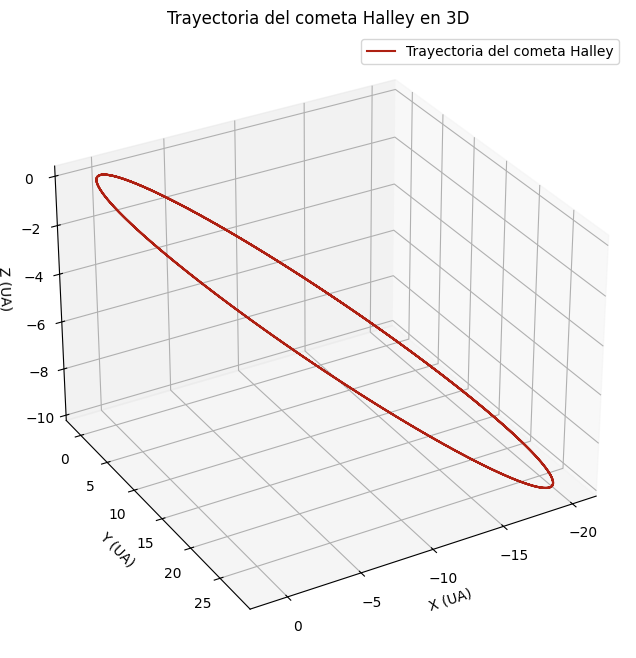

In [161]:
# Trayectoria en 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, label='Trayectoria del cometa Halley', color='#ae2012')

ax.set_xlabel('X (UA)')
ax.set_ylabel('Y (UA)')
ax.set_zlabel('Z (UA)')
ax.set_title('Trayectoria del cometa Halley en 3D')

ax.view_init(elev=30, azim=60)

ax.legend()
plt.show()



In [159]:
# Posici√≥n y velocidad a los 100 a√±os (2086)
pos_2086 = trajectory[int(100 / dt), :3]
vel_2086 = trajectory[int(100 / dt), 3:]
print("Posici√≥n (UA) en 2086:..", pos_2086)
print("Velocidad en 2086:......", vel_2086)

# Posici√≥n y velocidad a los 200 a√±os (2186)
pos_2186 = trajectory[int(200 / dt), :3]
vel_2186 = trajectory[int(200 / dt), 3:]
print("Posici√≥n (UA) en 2186:..", pos_2186)
print("Velocidad en 2186:......", vel_2186)


Posici√≥n (UA) en 2086:.. [-19.84490276  23.56364952  -9.38239428]
Velocidad en 2086:...... [-0.12434545  0.47169782 -0.11356382]
Posici√≥n (UA) en 2186:.. [-17.15490663  27.47483738  -9.31161824]
Velocidad en 2186:...... [ 0.32643984 -0.14795328  0.11382631]
